In [3]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

# Summary

The goal is to create diagram consisting of three parts:

1. Table with several rackets and their features
2. Simulated plot with 4 clusters on 2 dimensions
3. Add colors to simulated plot( Control, Power, Spin and Oversized)
4. Save three plots into one figure

#  Table with several rackets and their features


In [9]:
path = 'data/full_raquets_dataset.csv'
df = pd.read_csv(path)
cols = ['Model', 'Brand', 'HeadSize', 'Length',	'UnStrungWeight', 	'SwingWeight', 'Stiffness' ]
df = df[cols].set_index('Model')
df

,Brand,HeadSize,Length,UnStrungWeight,SwingWeight,Stiffness
Model,,,,,,
WilsonRolandGarrosEquipeHP,Wilson,100.0,68.50,286.0,300.0,68.0
WilsonBlade98Sv9,Wilson,98.0,68.50,295.0,299.0,62.0
WilsonBlade9816x19v9,Wilson,98.0,68.50,305.0,324.0,62.0
WilsonUltra100LV4.0,Wilson,100.0,68.50,280.0,299.0,64.0
WilsonBladeFeel103,Wilson,103.0,68.50,264.0,308.0,68.0
...,...,...,...,...,...,...
V&#xf6;lklVostraV10(320g),Volkl,98.0,68.58,320.0,327.0,65.0
V&#xf6;lklVostraV10(300g),Volkl,98.0,68.58,300.0,314.0,68.0
PrinceTourCarbon100P(305g),Prince,100.0,68.58,305.0,322.0,61.0


In [14]:
sample_df = df.sample(10, random_state=42)

In [ ]:
data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]
columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

In [16]:
data = sample_df.values
columns = sample_df.columns
rows = sample_df.index

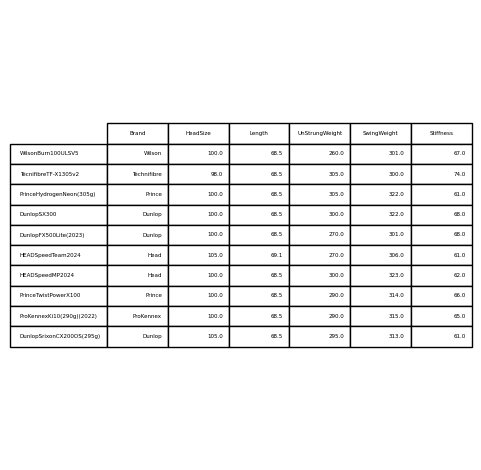

In [55]:
fig, ax = plt.subplots()
ax.axis("off")  # Hide the axis
plt.table(cellText=data,
          rowLabels=rows,
          colLabels=columns,
          loc='center')
plt.tight_layout()
plt.show()
fig.savefig('plots/data_table.png')

# 2. Simulated plot with 4 clusters on 2 dimensions


/var/folders/lc/lyptz9cs61g53f8hcyxjfwzr0000gp/T/ipykernel_47382/3544628411.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


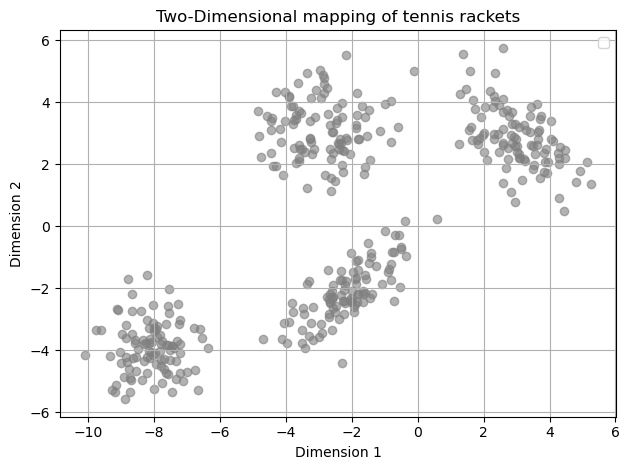

In [57]:
# Define parameters for the distributions
means = [np.array([-2, -2])
         , np.array([3, 3])
         , np.array([-3, 3])
         , np.array([-8, -4])]
covariances = [np.array([[1, 0.8], [0.8, 1]])
               , np.array([[1, -0.5], [-0.5, 1]])
               , np.array([[1, 0], [0, 1]])
               , np.array([[0.5, 0], [0, 0.5]])
              ]
fig, ax = plt.subplots()

# Generate and plot samples for each distribution
for mean, cov in zip(means, covariances):
    samples = np.random.multivariate_normal(mean, cov, num_samples)
    plt.scatter(samples[:, 0], samples[:, 1], alpha=0.6, color='grey')

# Add plot details
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.title("Two-Dimensional mapping of tennis rackets")
plt.grid(True)
plt.tight_layout()

plt.show()

fig.savefig('plots/sim_scatter.png')

# 3. Add colors to simulated plot( Control, Power, Spin and Oversized)


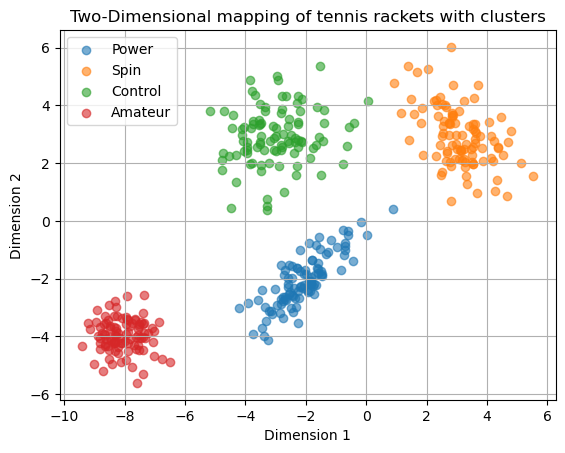

In [59]:

# Define parameters for the distributions
means = [np.array([-2, -2])
         , np.array([3, 3])
         , np.array([-3, 3])
         , np.array([-8, -4])]
covariances = [np.array([[1, 0.8], [0.8, 1]])
               , np.array([[1, -0.5], [-0.5, 1]])
               , np.array([[1, 0], [0, 1]])
               , np.array([[0.5, 0], [0, 0.5]])
              ]

labels = ['Power', 'Spin', 'Control', 'Amateur']
num_samples = 100
fig, ax = plt.subplots()

# Set up the plot

# Generate and plot samples for each distribution
for mean, cov, label in zip(means, covariances, labels):
    samples = np.random.multivariate_normal(mean, cov, num_samples)
    plt.scatter(samples[:, 0], samples[:, 1], alpha=0.6, label=label)

# Add plot details
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.title("Two-Dimensional mapping of tennis rackets with clusters")
plt.grid(True)
plt.show()
fig.savefig('plots/sim_scatter_with_colors.png')

In [ ]:
4